<a href="https://colab.research.google.com/github/Masoud0389/FDI-Attack-Detection/blob/main/FDI_Detection_DBSCAN_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Dataset

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
#!pwd

In [20]:
dataset = pd.read_csv('drive/MyDrive/Datasets/DS_FDI2.csv')

In [21]:
X = dataset.iloc[:, :]

In [22]:
#print(X)

# Feature Scaling

In [23]:
from sklearn.utils.sparsefuncs import min_max_axis
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
# Scaling the data to bring all the attributes to a comparable level
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
#scaler = RobustScaler()
#X_scaled = scaler.fit_transform(X)
maxabs_scaler = MaxAbsScaler()
X_scaled = maxabs_scaler.fit_transform(X)
#min_max_scaler = preprocessing.MinMaxScaler()
#X_scaled = min_max_scaler.fit_transform(X) 
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

# Feature Selection/Reduction

In [24]:
#from sklearn.decomposition import PCA
#print(np.shape(X_normalized))
#pca = PCA(n_components = 2, whiten = True)
#X_principal = pca.fit_transform(X_normalized)
#X_principal = pd.DataFrame(X_principal)


In [25]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, algorithm='arpack')
X_principal = svd.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)

# Plot Test

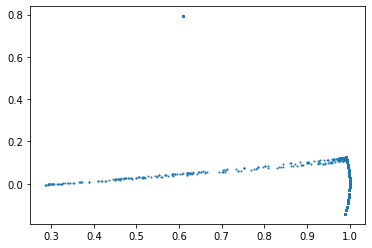

In [12]:
plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1], s = 1 , alpha=1)

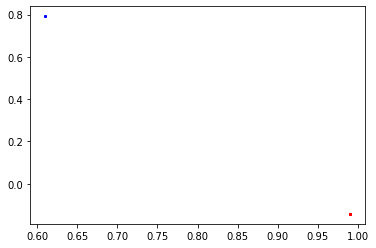

In [13]:
plt.scatter(X_principal.iloc[:8000,0], X_principal.iloc[:8000,1], c = 'b', s = 1 , alpha=1)
plt.scatter(X_principal.iloc[10000:30000,0], X_principal.iloc[10000:30000,1],c = 'b', s = 1 , alpha=1)
plt.scatter(X_principal.iloc[8000:10000,0], X_principal.iloc[8000:10000,1], c = 'r', s = 1 , alpha=1)
plt.show()

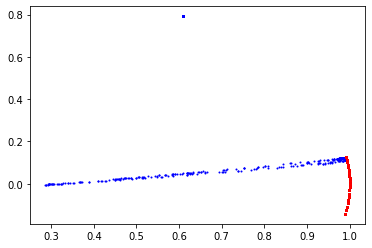

In [14]:

#print(X_principal.iloc[:,0])
plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1],c = 'b', s = 1 , alpha=1)
for i in range(0,20):
  plt.scatter(X_principal.iloc[8000 + 30000*i:10000+ 30000*i,0], X_principal.iloc[8000+ 30000*i:10000+ 30000*i,1],c = 'r', s = 1 , alpha=1)
  plt.scatter(X_principal.iloc[16000 + 30000*i:18000+ 30000*i,0], X_principal.iloc[16000+ 30000*i:18000+ 30000*i,1],c = 'r', s = 1 , alpha=1)
#plt.title('Scatter plot')
#plt.xlabel('x')
#plt.ylabel('y')
plt.show()

# Anomaly Detection

In [15]:
from sklearn.cluster import DBSCAN
#Numpy array of all the cluster labels assigned to each data point
label = DBSCAN(eps = 0.01, min_samples = 500, algorithm='ball_tree', leaf_size = 1000).fit_predict(X_principal)
#label = db_default.labels_
#labels.to_csv('test_DBSCAN1.csv')

In [ ]:
# First you will need to upgrade pip and numpy
#!pip install --upgrade pip
#!pip install numpy==1.16.0
# Important! Runtime needs a restart at this point. Go to menubar "Runtime > Restart runtime..."
# Once restarted, you can resume
#!pip install Cython
#!pip install hdbscan
# You should now be able to import hdbscan
#import hdbscan
#label = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True, gen_min_span_tree=False, metric='euclidean', min_cluster_size=, min_samples=1000, p=None).fit_predict(X_principal)

In [ ]:
#from sklearn.ensemble import IsolationForest
#label = IsolationForest(n_estimators= 50, contamination=0.13, max_samples=4500).fit_predict(X_principal)

In [ ]:
#from sklearn.cluster import Birch
#label = Birch(n_clusters=2, threshold=0.5, branching_factor=10).fit_predict(X_principal)

In [ ]:
#from sklearn.cluster import OPTICS
#label = OPTICS(min_cluster_size = 5000, max_eps = 0.005, n_jobs= -1).fit_predict(X_principal)
#label.to_csv('test_OPTICS1.csv')

In [ ]:
#from sklearn.cluster import MeanShift
#label = MeanShift().fit_predict(X_principal)

In [ ]:
#from sklearn.cluster import MiniBatchKMeans
#label = MiniBatchKMeans(n_clusters=2, init='k-means++').fit_predict(X_principal)

In [ ]:
#from sklearn.neighbors import LocalOutlierFactor
#lof = LocalOutlierFactor(n_neighbors=500)
#label = lof.fit_predict(X_principal)

In [45]:
#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=2, algorithm='elkan', init='k-means++')
#label = kmeans.fit_predict(X_principal)

In [ ]:
#from sklearn.cluster import AgglomerativeClustering
#agg = AgglomerativeClustering()
#label = agg.fit_predict(X_principal)

In [ ]:
#print(label)
#label = pd.DataFrame(label, columns = ['Column_A'])
#label.to_csv("lof_test1.csv")

# Visualization

In [52]:
label = pd.read_csv('drive/MyDrive/Datasets/test_DBSCAN1.csv')
label = pd.DataFrame(label.iloc[:,1]).to_numpy()

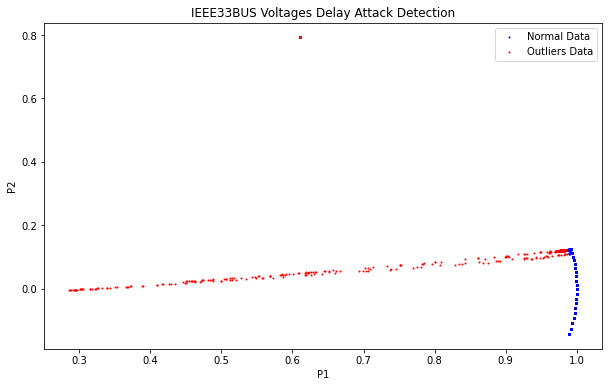

In [53]:
plt.rcParams["figure.figsize"] = (10,6)
plt.scatter(X_principal.loc[label != -1, 0], X_principal.loc[label != -1, 1], s = 1, c = 'blue', label = 'Normal Data')
plt.scatter(X_principal.loc[label == -1, 0], X_principal.loc[label == -1, 1], s = 1, c = 'red', label = 'Outliers Data')
#plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1], c = label, s = 1 , alpha=1)
#plt.scatter(values.iloc[:, 0], values.iloc[:, 1], c = 'r', s = 1 , alpha=1)
plt.title('IEEE33BUS Voltages Delay Attack Detection')
plt.xlabel('P1')
plt.ylabel('P2')
plt.legend()
plt.show()

No handles with labels found to put in legend.


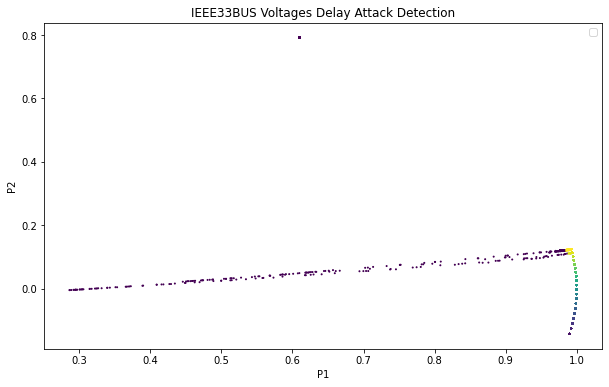

In [54]:
plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1], c = label, s = 1 , alpha=1)
plt.title('IEEE33BUS Voltages Delay Attack Detection')
plt.xlabel('P1')
plt.ylabel('P2')
plt.legend()
plt.show()

In [ ]:
#index = np.where(label == -1)
#index1 = np.where(label==1)
#index = tuple((i+100000)/20000 for i in index)
#index1 = tuple((i+100000)/20000 for i in index1)

In [ ]:
#plt.scatter(index, X_principal.loc[label == -1, 1], s = 1, c = 'red', label = 'Outliers Data')
#plt.scatter(index1, X_principal.loc[label == 1, 1], s = 1, c = 'blue', label = 'Normal Data')
#plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1], c = 'b', s = 1 , alpha=1)
#plt.scatter(values.iloc[:, 0], values.iloc[:, 1], c = 'r', s = 1 , alpha=1)
#plt.title('IEEE33BUS Voltages Delay Attack Detection')
#plt.xlabel('Time')
#plt.ylabel('V')
#plt.legend()
#plt.show() 

In [ ]:
#ind = pd.Series(range(1,500001))
#ind = (ind/20000)+5
#plt.scatter(index, X_principal.loc[label == -1, 1], s = 1, c = 'red', label = 'Outliers Data')

In [ ]:
#plt.scatter(ind[200000:260001], X_principal.loc[200000:260000,1], s = 1 )